<div class="alert alert-warning">

## **Task:**

<div class="alert alert-info">

You are given a sample of real signals, which consist of 128 points and belong to two classes.
If we plot these signals, it is already visually clear that a simple ML model will not be able to distinguish them unambiguously. Nevertheless, it is quite real.

- Try to come up with such features and make a forecast so that your accuracy is 100%.
- This task does not involve using third-party libraries other than numpy and pandas.
- Only two features are enough to separate the classes.

</div>

</div>

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.float_format", "{:,.3f}".format)
pd.set_option("display.max_columns", None)
import seaborn as sns
sns.set_theme(style="whitegrid")
from classes import Paths

In [2]:
paths = Paths()
path = paths.fen_train
df = pd.read_csv(path)
print(df.shape)
df.head(10)

(654, 130)


,signal_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38,p39,p40,p41,p42,p43,p44,p45,p46,p47,p48,p49,p50,p51,p52,p53,p54,p55,p56,p57,p58,p59,p60,p61,p62,p63,p64,p65,p66,p67,p68,p69,p70,p71,p72,p73,p74,p75,p76,p77,p78,p79,p80,p81,p82,p83,p84,p85,p86,p87,p88,p89,p90,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100,p101,p102,p103,p104,p105,p106,p107,p108,p109,p110,p111,p112,p113,p114,p115,p116,p117,p118,p119,p120,p121,p122,p123,p124,p125,p126,p127,p128,label
0,3,-0.178,-0.082,-0.096,-0.099,-0.099,-0.105,-0.083,-0.074,-0.065,-0.062,-0.055,-0.027,0.021,0.088,0.113,0.093,0.064,0.043,0.096,0.220,0.304,0.261,0.080,-0.144,-0.192,0.046,0.297,0.314,0.164,-0.054,-0.215,-0.221,-0.188,-0.219,-0.244,-0.258,-0.267,-0.205,-0.162,-0.181,-0.143,-0.035,0.129,0.304,0.382,0.320,0.247,0.266,0.245,0.218,0.224,0.097,-0.180,-0.481,-0.481,-0.249,-0.158,-0.021,0.003,-0.145,-0.051,-0.081,-0.190,-0.105,-0.120,-0.031,0.048,-0.014,0.048,0.061,0.099,0.140,0.061,0.064,0.090,0.199,0.358,0.322,0.128,-0.063,-0.021,0.172,0.272,0.252,0.087,-0.116,-0.228,-0.246,-0.248,-0.305,-0.306,-0.268,-0.251,-0.203,-0.195,-0.173,-0.075,0.042,0.231,0.383,0.398,0.388,0.404,0.440,0.420,0.236,-0.037,-0.187,-0.211,-0.310,-0.307,-0.094,-0.027,-0.090,-0.139,-0.195,-0.161,-0.127,-0.112,-0.068,-0.059,-0.014,0.009,0.010,0.070,0.108,0.128,0.099,0
1,4,0.010,0.011,0.118,0.260,0.340,0.329,0.281,0.116,-0.173,-0.247,-0.046,0.181,0.339,0.354,0.179,-0.037,-0.154,-0.181,-0.196,-0.231,-0.253,-0.308,-0.363,-0.331,-0.287,-0.210,-0.082,0.025,0.181,0.349,0.406,0.366,0.361,0.502,0.560,0.237,-0.309,-0.515,-0.185,0.102,0.054,-0.064,-0.193,-0.310,-0.335,-0.267,-0.091,0.023,-0.022,-0.047,-0.048,-0.085,-0.045,0.024,0.006,0.004,0.026,-0.017,-0.025,0.033,0.153,0.336,0.372,0.174,-0.086,-0.170,0.025,0.258,0.347,0.332,0.152,-0.112,-0.197,-0.175,-0.235,-0.264,-0.273,-0.333,-0.335,-0.301,-0.245,-0.151,-0.115,-0.077,0.050,0.231,0.356,0.347,0.305,0.317,0.403,0.482,0.320,-0.088,-0.383,-0.296,-0.047,0.043,0.018,-0.071,-0.203,-0.272,-0.280,-0.191,-0.093,-0.078,-0.034,-0.069,-0.151,-0.082,-0.014,-0.021,-0.013,0.003,0.047,0.103,0.118,0.144,0.252,0.370,0.344,0.159,-0.102,-0.301,-0.149,0.264,0.480,0.420,0
2,5,-0.222,-0.248,-0.188,-0.182,-0.109,-0.099,-0.083,-0.055,-0.101,-0.068,-0.033,0.021,0.098,0.100,0.118,0.130,0.176,0.203,0.082,-0.006,0.019,0.105,0.283,0.497,0.511,0.295,0.109,-0.109,-0.360,-0.386,-0.316,-0.306,-0.272,-0.214,-0.210,-0.229,-0.217,-0.222,-0.180,-0.060,0.084,0.249,0.311,0.302,0.360,0.394,0.349,0.316,0.263,0.071,-0.144,-0.199,-0.130,-0.072,-0.087,-0.092,-0.111,-0.183,-0.218,-0.236,-0.219,-0.145,-0.106,-0.086,-0.092,-0.122,-0.122,-0.105,-0.017,0.140,0.215,0.151,0.109,0.208,0.245,0.098,-0.044,-0.037,0.107,0.327,0.516,0.478,0.279,0.120,-0.103,-0.333,-0.460,-0.463,-0.316,-0.282,-0.279,-0.204,-0.225,-0.163,-0.130,-0.114,0.073,0.147,0.187,0.287,0.262,0.226,0.243,0.223,0.192,0.292,0.345,0.077,-0.267,-0.327,-0.160,-0.065,-0.055,-0.074,-0.175,-0.229,-0.260,-0.242,-0.123,-0.086,-0.080,-0.090,-0.123,-0.074,-0.019,0.055,0.098,0.068,0
3,6,0.412,0.514,0.559,0.380,0.211,0.174,0.103,-0.052,-0.237,-0.245,-0.156,-0.115,-0.042,-0.062,-0.158,-0.200,-0.250,-0.246,-0.176,-0.131,-0.082,-0.074,-0.097,-0.074,-0.056,0.013,0.113,0.109,0.031,0.003,0.169,0.359,0.259,0.019,-0.130,-0.129,-0.006,0.132,0.373,0.560,0.454,0.329,0.106,-0.266,-0.358,-0.375,-0.420,-0.290,-0.270,-0.310,-0.287,-0.319,-0.249,-0.129,-0.027,0.150,0.312,0.403,0.426,0.427,0.334,0.162,0.140,0.040,-0.188,-0.138,-0.035,-0.072,-0.057,-0.117,-0.223,-0.245,-0.251,-0.208,-0.164,-0.142,-0.110,-0.119,-0.119,-0.113,-0.068,0.043,0.075,0.039,-0.008,-0.042,0.009,0.083,0.121,0.137,0.030,-0.135,-0.062,0.161,0.386,0.630,0.586,0.340,0.104,-0.255,-0.443,-0.435,-0.429,-0.327,-0.288,-0.272,-0.229,-0.234,-0.141,-0.046,0.041,0.186,0.283,0.338,0.388,0.471,0.441,0.286,0.193,0.114,0.014,-0.112,-0.134,-0.024,-0.043,-0.063,-0.078,-0.194,0
4,7,0.222,-0.027,-0.249,-0.341,-0.289,-0.207,-0.156,-0.092,-0.119,-0.1

In [3]:
df['signal_id'].nunique()
df['signal_id'].max()

1222

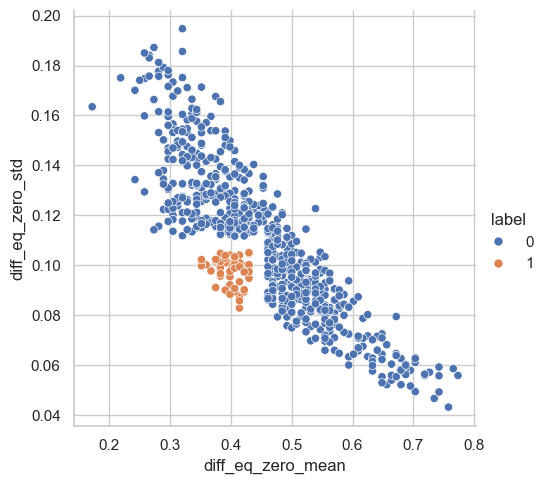

In [4]:
def make_new_df(df, mode="train", th=0.05):
    
    # melt dataset into long format
    df_melt = df.melt(
        id_vars="signal_id",
        value_vars=[f"p{i}" for i in range(1, 128 + 1)],
        var_name="orders",
        value_name="value",
        ignore_index=True,
    )

    if mode == "train":
        df_melt = df_melt.merge(df[["signal_id", "label"]], on="signal_id", how="left")

    # differentiated series
    df_melt["diff_value"] = df_melt.groupby("signal_id", as_index=False)["value"].transform(pd.Series.diff)

    # data has noise, so we choose a threshold around zero (th we choose by eye)
    df_melt["diff_eq_zero"] = (df_melt["diff_value"] < th) * (df_melt["diff_value"] > -th) == 1

    # Считаем признаки по всему ряду
    cols = {"train": ["signal_id", "label"], "test": ["signal_id"]}
    df_melt_gr = df_melt.groupby(cols[mode], as_index=False).agg(
        diff_eq_zero_mean=("diff_eq_zero", "mean"),
        diff_eq_zero_std=("diff_value", "std"),
    )
    return df_melt_gr



train = pd.read_csv(path)

train_melt_gr = make_new_df(train, mode="train")
# Смотрим на график и понимаем, что класс можно отделить условием
# row.diff_eq_zero_mean < 0.45 and row.diff_eq_zero_std < 0.11:

sns.relplot(data=train_melt_gr,
            x="diff_eq_zero_mean",
            y="diff_eq_zero_std",
            hue="label",
);

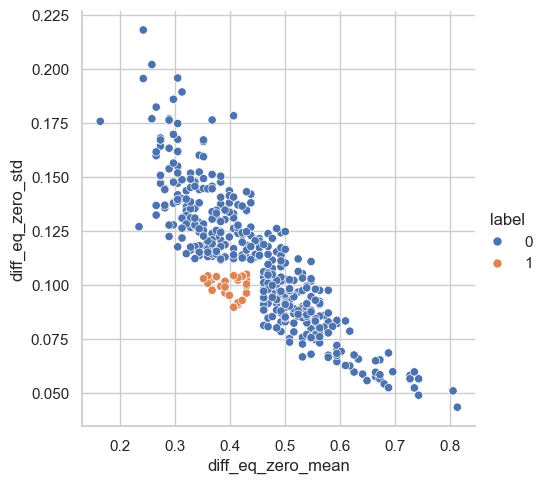

In [5]:
# prediction for the test
def f(row):
    if row.diff_eq_zero_mean < 0.45 and row.diff_eq_zero_std < 0.11:
        return 1
    return 0

path = paths.fen_test
test = pd.read_csv(path)

test_melt_gr = make_new_df(test, mode="test")
test_melt_gr["label"] = test_melt_gr.apply(f, axis=1)
sns.relplot(data=test_melt_gr, x="diff_eq_zero_mean", y="diff_eq_zero_std", hue="label");

In [6]:
test

,signal_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38,p39,p40,p41,p42,p43,p44,p45,p46,p47,p48,p49,p50,p51,p52,p53,p54,p55,p56,p57,p58,p59,p60,p61,p62,p63,p64,p65,p66,p67,p68,p69,p70,p71,p72,p73,p74,p75,p76,p77,p78,p79,p80,p81,p82,p83,p84,p85,p86,p87,p88,p89,p90,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100,p101,p102,p103,p104,p105,p106,p107,p108,p109,p110,p111,p112,p113,p114,p115,p116,p117,p118,p119,p120,p121,p122,p123,p124,p125,p126,p127,p128
0,0,0.048,0.076,0.086,0.088,0.133,0.239,0.325,0.264,0.129,0.042,0.024,0.040,0.040,0.139,0.262,0.182,0.048,-0.057,-0.152,-0.190,-0.286,-0.359,-0.337,-0.347,-0.317,-0.230,-0.166,-0.094,0.016,0.130,0.167,0.247,0.371,0.349,0.381,0.470,0.352,0.170,-0.040,-0.286,-0.332,-0.252,-0.206,-0.161,-0.134,-0.143,-0.153,-0.149,-0.149,-0.132,-0.073,-0.015,0.015,0.027,0.049,0.061,0.068,0.107,0.101,0.062,0.075,0.151,0.287,0.350,0.290,0.151,-0.084,-0.161,0.013,0.136,0.160,0.126,-0.006,-0.119,-0.159,-0.186,-0.265,-0.342,-0.345,-0.338,-0.307,-0.272,-0.246,-0.094,0.095,0.193,0.287,0.405,0.402,0.330,0.373,0.367,0.320,0.279,0.053,-0.114,-0.196,-0.359,-0.324,-0.160,-0.110,-0.106,-0.135,-0.162,-0.141,-0.123,-0.088,-0.034,-0.029,-0.015,-0.003,-0.030,0.006,0.048,0.053,0.069,0.061,0.071,0.139,0.256,0.345,0.252,0.035,-0.141,-0.132,0.093,0.291,0.306
1,1,0.093,0.210,0.391,0.443,0.430,0.452,0.311,-0.075,-0.298,-0.201,-0.071,0.021,0.098,0.043,-0.072,-0.154,-0.303,-0.340,-0.227,-0.199,-0.130,-0.091,-0.161,-0.136,-0.119,-0.081,-0.000,-0.011,-0.002,0.050,0.128,0.205,0.223,0.335,0.441,0.286,0.101,0.161,0.186,0.111,0.149,0.083,-0.047,-0.082,-0.218,-0.264,-0.178,-0.199,-0.198,-0.190,-0.226,-0.198,-0.174,-0.166,-0.143,-0.116,-0.038,0.024,0.025,0.092,0.251,0.369,0.383,0.400,0.444,0.337,0.037,-0.233,-0.210,-0.020,0.020,0.052,0.023,-0.177,-0.212,-0.221,-0.261,-0.196,-0.214,-0.166,-0.110,-0.132,-0.077,-0.104,-0.097,-0.020,0.011,0.081,0.082,0.099,0.200,0.308,0.415,0.348,0.137,-0.078,-0.116,0.182,0.434,0.345,0.019,-0.264,-0.188,-0.088,-0.215,-0.199,-0.150,-0.201,-0.151,-0.157,-0.187,-0.126,-0.132,-0.108,-0.053,-0.037,0.012,0.086,0.188,0.234,0.271,0.329,0.348,0.427,0.299,-0.060,-0.177,-0.084
2,8,0.045,0.183,0.293,0.367,0.342,0.316,0.344,0.302,0.243,0.187,0.016,-0.197,-0.302,-0.281,-0.204,-0.123,-0.065,-0.083,-0.113,-0.116,-0.156,-0.157,-0.097,-0.051,-0.035,-0.048,-0.022,0.046,0.107,0.137,0.084,0.038,0.038,0.081,0.245,0.373,0.294,0.087,-0.107,-0.152,-0.066,0.056,0.228,0.296,0.118,-0.047,-0.104,-0.171,-0.217,-0.257,-0.245,-0.251,-0.297,-0.235,-0.231,-0.230,-0.084,0.076,0.202,0.220,0.276,0.369,0.283,0.233,0.307,0.361,0.353,0.299,0.169,-0.100,-0.314,-0.347,-0.293,-0.202,-0.141,-0.104,-0.108,-0.128,-0.102,-0.095,-0.056,0.001,-0.007,-0.007,-0.017,-0.028,0.018,0.081,0.110,0.079,0.065,0.100,0.162,0.264,0.296,0.175,-0.014,-0.127,-0.051,0.129,0.283,0.336,0.162,-0.071,-0.124,-0.169,-0.284,-0.360,-0.373,-0.319,-0.263,-0.237,-0.237,-0.209,-0.081,0.061,0.194,0.327,0.368,0.291,0.207,0.242,0.259,0.210,0.213,0.077,-0.204,-0.346
3,9,0.182,-0.338,-0.080,0.393,0.374,0.112,-0.220,-0.356,-0.303,-0.435,-0.351,-0.225,-0.336,-0.218,-0.204,-0.219,-0.042,0.015,0.168,0.220,0.138,0.193,0.245,0.341,0.300,0.220,0.325,0.430,0.585,0.549,0.190,-0.134,-0.324,-0.459,-0.603,-0.616,-0.525,-0.532,-0.486,-0.439,-0.468,-0.373,-0.080,0.246,0.281,0.336,0.587,0.489,0.414,0.531,0.276,-0.093,-0.284,-0.088,0.254,0.074,-0.121,-0.204,-0.413,-0.300,-0.241,-0.301,-0.202,-0.268,-0.245,-0.126,-0.052,0.125,0.117,0.052,0.087,0.144,0.311,0.381,0.366,0.305,0.180,0.283,0.478,0.518,0.375,0.011,-0.329,-0.498,-0.555,-0.532,-0.516,-0.482,-0.472,-0.504,-0.465,-0.373,-0.080,0.316,0.372,0.312,0.429,0.432,0.363,0.393,0.294,0.030,-0.156,0.001,0.318,0.233,-0.038,-0.197,-0.347,-0.324,-0.309,-0.306,-0.204,-0.254,-0.236,-0.192,-0.204,-0.052,0.127,0.275,0.192,0.074,0.244,0.276,0.239,0.276,0.257,0.360
4,10,0.378,0.138,-0.064,-0.201,-0.067,0.128,0.222,0.258,0.094,-0.120,-0.278,-0.392,-0.351,-0.300,-0.245,-0.179,-0.

In [7]:
test['label'] = make_new_df(test, mode="test").apply(f, axis=1)
test[['signal_id', 'label']].to_csv('../data/03.2.11_submission.csv', index=False)
